In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import lhsmdu
import time
import random

from PIL import Image, ImageDraw

## Mandelbrot

s is a sample (pixel/point of plot). i is number of iterations before stating that does not go to infinity, and therefore does not lie within the mandelbrot set. 

Investigates what happens when s and i increase separetly. 

In [2]:
c = complex(2,2)
Z0 = c
Z = Z0

def amount_iter(compl, max_steps, threshold_inf: int = 2):
    c = compl
    z = 0
    i = 0
    while abs(z) < threshold_inf and i < max_steps:
        z = z**2 + c
        i += 1
    return i

#z*z.conjugate()).real

## Plotting the MandelBrot set

In [ ]:
max_steps = 1000 # this is equal to i

# Image size (pixels), this is equal to the amount of samples s
X_WIDTH = 900
Y_HEIGHT = 600

# Plot window
real_minus = -2
real_max = 1
real_dif = real_max - real_minus
imag_minus = -1
imag_max = 1
imag_dif = imag_max - imag_minus

im = Image.new('HSV', (X_WIDTH, Y_HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)
percentage = 0


for pix_x in range(0, X_WIDTH):
    for pix_y in range(0, Y_HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(real_minus + (pix_x / X_WIDTH) * real_dif,
                    imag_minus + (pix_y / Y_HEIGHT) * imag_dif)
        # Compute the number of iterations
        m = amount_iter(c, max_steps)
        # The color depends on the number of iterations
        hue = int(255 * m / max_steps)
        saturation = 255
        if m < max_steps:
            value = 255 
        else:
            value = 0
        # Plot the point
        draw.point([pix_x, pix_y], (hue, saturation, value))
#     if percentage != str(round(pix_x/X_WIDTH,2)):
#         percentage = str(round(pix_x/X_WIDTH,2))
#         print("Percentage: " + percentage + "%")
        
im.convert('RGB').save('output.png', 'PNG')

imgplot = plt.imshow(im.convert('RGB'))

## Monte Carlo

In [3]:
def xy_rand():
    x = 3*np.random.random_sample()-2       # X domain is [-2,1]
    y = 2*np.random.random_sample()-1       # Y domain is [-1,1]
    return x,y 

In [62]:
## Change the amount of i (iterations) before stating that the point does not go to infinity
start = time.time()
t = 0
samples = [500, 1000]
simulations = 10
listA = [[[],[]]]
for i in range(simulations-1):
    listA.append([[],[]])
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for simulation in range(simulations):
    print("Simulation: " + str(simulation)
    for value in range(len(samples)):               # for different sample size
        for max_steps in range(1,maxmax_steps,2):       # maximum amount of step sizes for each sample
            t = 0
            f = 0
    #         print(listA)
            for s in range(samples[value]):         # take samples 
                x, y = xy_rand()
                m = amount_iter(complex(x,y), max_steps)
    #             print(m)
                if m == max_steps:
                    t += 1
            listA[simulation][value].append(t/samples[value]*6)
    
end = time.time()
print("Running time: " + str(end - start))

Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Running time: 702.9406311511993


In [63]:
# print(len((listA[0][0])))

500


In [111]:
## Create new list where the sample with the most i is subtracted from all the values
## Next create a new list, where you reorder everything, now having all samples from each for each i, s in the same list
listAdif = [[[],[]]]
for i in range(simulations-1):
    listAdif.append([[],[]])

for simulation in range(simulations):
    for value in range(len(samples)):
        for x in range(len(listA[simulation][value])):
            listAdif[simulation][value].append(listA[simulation][value][x])
        for i in range(len(listAdif[simulation][value])):
            listAdif[simulation][value][i] -= listAdif[simulation][value][len(listAdif[simulation][value])-1]

preAnewlistA = [[]]
for i in range(499):
    preAnewlistA.append([])
preBnewlistA = [[]]
for i in range(499):
    preBnewlistA.append([])
newlistA = []
newlistA.append(preAnewlistA)
newlistA.append(preBnewlistA)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
            newlistA[sample_size][i]
            newlistA[sample_size][i].append(listAdif[simulation][sample_size][i])                          

In [84]:
# print((listAdif[0][0]))

In [112]:
means = [[],[]]
sd = [[],[]]
lower_bound = [[],[]]
upper_bound = [[],[]]
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        means[sample_size].append(statistics.mean(newlistA[sample_size][i]))
        sd[sample_size].append(statistics.stdev(newlistA[sample_size][i]))
        lower_bound[sample_size].append(means[sample_size][i] - 1.96*sd[sample_size][i]/math.sqrt(simulations))
        upper_bound[sample_size].append(means[sample_size][i] + 1.96*sd[sample_size][i]/math.sqrt(simulations))

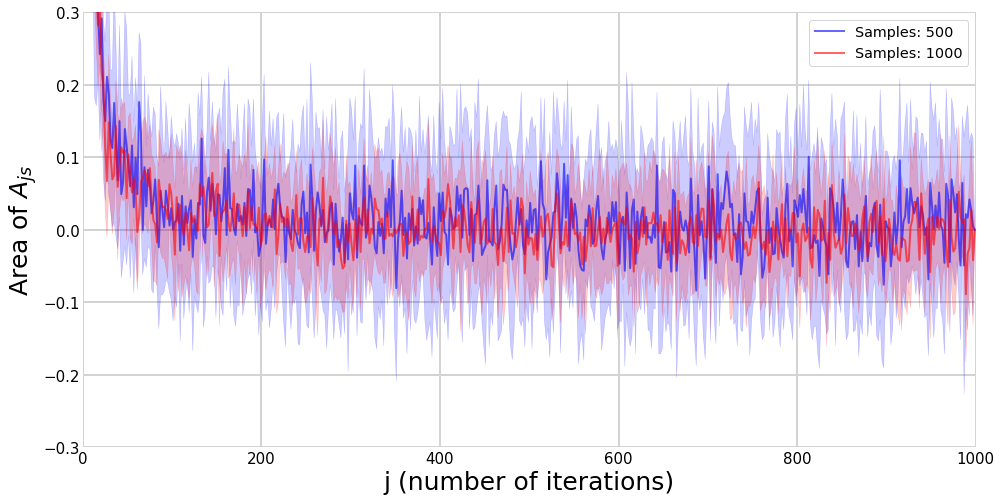

In [143]:
colors = ['b', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)

for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), means[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_bound[value],
                y2 = upper_bound[value], linewidth = 0.5, color=colors[value], alpha=0.2)
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Area of $A_{js}$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
# ax.set_yscale('log')
ax.set_ylim(-0.3,0.3)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.legend(fontsize="x-large")
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

## Latin Hypercube sampling

In [127]:
def xy_LHS(samples, dimensions = 2, strength = 1):
    xrange = [-2,1]
    yrange = [-1,1]
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    xlist = np.zeros([int(MAJOR)])
    ylist = np.zeros([int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    m = xrange[0] + (0.5/samples)*xdif
    n = yrange[0] + (0.5/samples)*ydif
    for j in range(MAJOR):
        xlist[j] = m + np.random.random_sample()*xdif*(1/(2*MAJOR))
        ylist[j] = n + np.random.random_sample()*ydif*(1/(2*MAJOR))
        n += (1/samples)*ydif
        m += (1/samples)*xdif
    for k in range(samples):
        xlist = np.random.permutation(xlist)
        ylist = np.random.permutation(ylist)
    return xlist,ylist

In [135]:
## Approximation by LHS

start = time.time()
simulations = 10
listLHS = [[[],[]]]
for i in range(simulations-1):
    listLHS.append([[],[]])

samples = [500, 1000]
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for simulation in range(simulations):
    for value in range(len(samples)):
        print("Amount of samples: " + str(samples[value]))
        for max_steps in range(1,maxmax_steps,2):
            t = 0
            x_LHS,y_LHS = xy_LHS(samples[value])
            if max_steps%100 == 0:
                print("Percentage: "+ str(max_steps/maxmax_steps * 100) + "%")
            for index in range(len(x_LHS)):
    #             print(index)
                x, y = x_LHS[index], y_LHS[index]
                m = amount_iter(complex(x,y), max_steps)
                if m == max_steps:
                    t += 1
        #     print(t/it*6)
            listLHS[simulation][value].append(t/samples[value]*6)

end = time.time()
print("Running time: " + str(end - start))

Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Amount of samples: 500
Amount of samples: 1000
Running time: 862.3044083118439


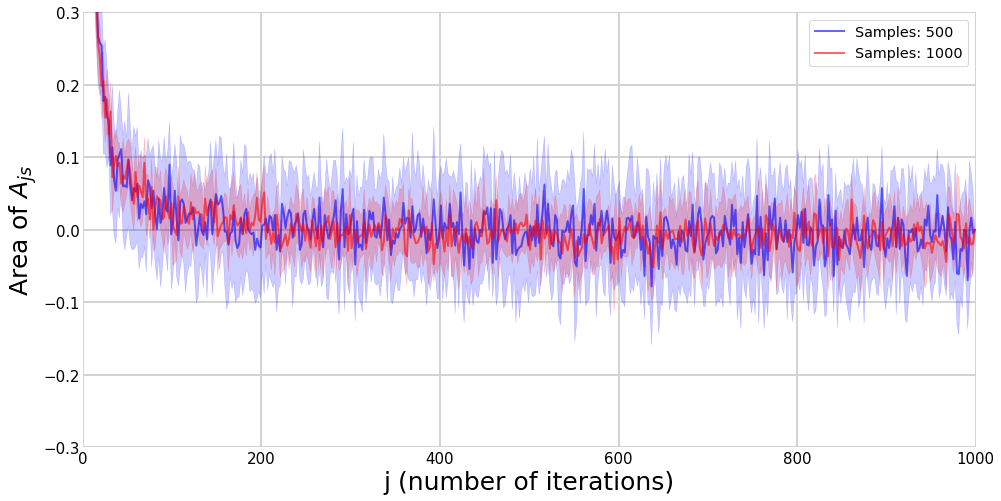

In [142]:
listLHSdif = [[[],[]]]
for i in range(simulations-1):
    listLHSdif.append([[],[]])
    
for simulation in range(simulations):
    for value in range(len(samples)):
        for x in range(len(listLHS[simulation][value])):
            listLHSdif[simulation][value].append(listLHS[simulation][value][x])
        for i in range(len(listLHSdif[simulation][value])):
            listLHSdif[simulation][value][i] -= listLHSdif[simulation][value][len(listLHSdif[simulation][value])-1]
            
            

preAnewlistLHS = [[]]
for i in range(499):
    preAnewlistLHS.append([])
preBnewlistLHS = [[]]
for i in range(499):
    preBnewlistLHS.append([])
newlistLHS = []
newlistLHS.append(preAnewlistLHS)
newlistLHS.append(preBnewlistLHS)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
            newlistLHS[sample_size][i]
            newlistLHS[sample_size][i].append(listLHSdif[simulation][sample_size][i])                   


meansLHS = [[],[]]
sdLHS = [[],[]]
lower_boundLHS = [[],[]]
upper_boundLHS = [[],[]]
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        meansLHS[sample_size].append(statistics.mean(newlistLHS[sample_size][i]))
        sdLHS[sample_size].append(statistics.stdev(newlistLHS[sample_size][i]))
        lower_boundLHS[sample_size].append(meansLHS[sample_size][i] - 1.96*sdLHS[sample_size][i]/math.sqrt(simulations))
        upper_boundLHS[sample_size].append(meansLHS[sample_size][i] + 1.96*sdLHS[sample_size][i]/math.sqrt(simulations))


colors = ['b', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)
for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), meansLHS[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_boundLHS[value],
                y2 = upper_boundLHS[value], linewidth = 0.5, color=colors[value], alpha=0.2)
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Area of $A_{js}$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="x-large")
ax.set_ylim(-0.3,0.3)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

## Orthogonal

In [144]:
def another_Orthogonal(ns):
    xrange = [-2,1]
    yrange = [-1,1]
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
#     assert(np.sqrt(ns) % 1 == 0),"Please insert an even number of samples"
    n = int(np.sqrt(ns))
    # Making a datastructure of a dict with coordinate tuples of a bigger grid with subcoordinate of sub-grid points
    blocks = {(i,j):[(a,b) for a in range(n) for b in range(n)] for i in range(n) for j in range(n)}
    points = []#np.empty((n,2))
    append = points.append # tips of python to fasten up append call
    for block in blocks:
        point = random.choice(blocks[block])
        lst_row = [(k1, b) for (k1, b), v in blocks.items() if k1 == block[0]]
        lst_col = [(a, k1) for (a, k1), v in blocks.items() if k1 == block[1]]

        for col in lst_col:
            blocks[col] = [a for a in blocks[col] if a[1] != point[1]]

        for row in lst_row:
            blocks[row] = [a for a in blocks[row] if a[0] != point[0]]
        #Adjust the points to fit the grid they fall in  
        point = (point[0] + n * block[0], point[1] + n * block[1])
        append(point)
    x = []
    y = []
    for i in range(len(points)):
#         x = (3*points[i][0]/ns-2 + np.random.random_sample()*xdif/(2*ns)).append
#         y = (3*points[i][1]/ns-2 + np.random.random_sample()*ydif/(2*ns)).append
        x.append(3*points[i][0]/ns-2 + np.random.random_sample()*xdif/(2*ns))
        y.append(2*points[i][1]/ns-1 + np.random.random_sample()*ydif/(2*ns))
    return x,y

# x_LHS,y_LHS = xy_LHS(20)

# xlist = []
# ylist = []
# for i in range(20):
#     x, y = xy_rand()
# #     x = (x+ 2)/3
# #     y = (y + 1)/2
#     xlist.append(x)
#     ylist.append(y)
    
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
# plt.scatter(x_orth, y_orth, color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
# plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
# plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

# plt.legend(bbox_to_anchor=(1.05, 1))
# plt.grid()
# plt.show()

In [ ]:
start = time.time()

samples = [500, 1000]
simulations = 10
listorth = [[[],[]]]
for i in range(simulations-1):
    listorth.append([[],[]])
max_steps = 1000 # this is equal to i
maxmax_steps = 1000
startint = time.time()

for simulation in range(simulations):
    print("Simulation: " + str(simulation+1) + " out of " + str(simulations))
    for value in range(len(samples)):
        print("Amount of samples: " + str(samples[value]))
        for max_steps in range(1,maxmax_steps,2):
            t = 0
            x_orth,y_orth = another_Orthogonal(samples[value])
            for index in range(len(x_orth)):
    #             print(index)
                x, y = x_orth[index], y_orth[index]
                m = amount_iter(complex(x,y), max_steps)
                if m == max_steps:
                    t += 1
        #     print(t/it*6)
            listorth[simulation][value].append(t/samples[value]*6)
            if max_steps%100 == 1:
                endint = time.time()
                print("Percentage: "+ str(max_steps/maxmax_steps * 100) + "%. Running time interval: " + str(endint - startint))
                startint = time.time()

end = time.time()
print("Running time: " + str(end - start))

Simulation: 1 out of 10
Amount of samples: 500
Percentage: 0.1%. Running time interval: 0.5575094223022461
Percentage: 10.100000000000001%. Running time interval: 32.546669006347656
Percentage: 20.1%. Running time interval: 26.68317222595215
Percentage: 30.099999999999998%. Running time interval: 26.228781700134277
Percentage: 40.1%. Running time interval: 30.02631187438965
Percentage: 50.1%. Running time interval: 29.34812617301941
Percentage: 60.099999999999994%. Running time interval: 31.548633337020874
Percentage: 70.1%. Running time interval: 30.178980350494385
Percentage: 80.10000000000001%. Running time interval: 30.676681756973267
Percentage: 90.10000000000001%. Running time interval: 30.813425302505493
Amount of samples: 1000
Percentage: 0.1%. Running time interval: 39.35083842277527


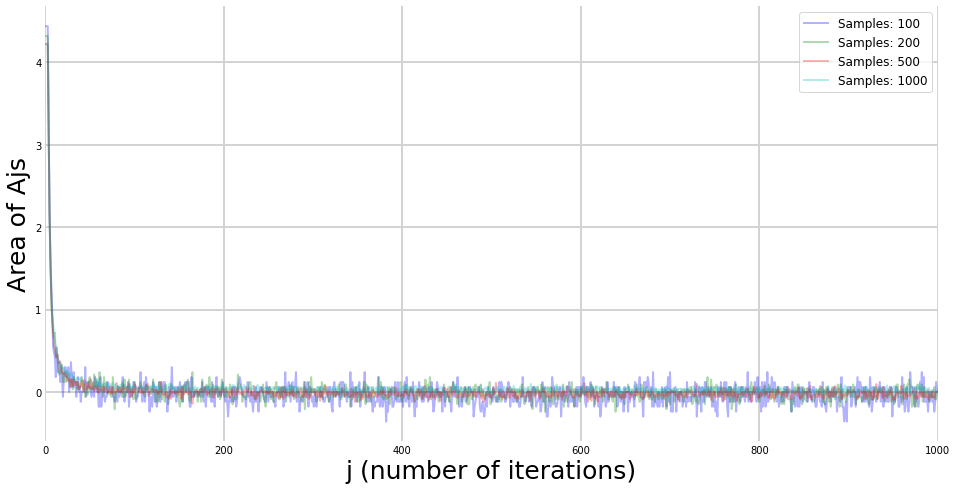

In [36]:
listorthdif = [[[],[]]]
for i in range(simulations-1):
    listorthdif.append([[],[]])
    
for simulation in range(simulations):
    for value in range(len(samples)):
        for x in range(len(listorth[simulation][value])):
            listorthdif[simulation][value].append(listorth[simulation][value][x])
        for i in range(len(listorthdif[simulation][value])):
            listorthdif[simulation][value][i] -= listorthdif[simulation][value][len(listorthdif[simulation][value])-1]
                      

preAnewlistorth = [[]]
for i in range(499):
    preAnewlistorth.append([])
preBnewlistorth = [[]]
for i in range(499):
    preBnewlistorth.append([])
newlistorth = []
newlistorth.append(preAnewlistorth)
newlistorth.append(preBnewlistorth)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
            newlistorth[sample_size][i]
            newlistorth[sample_size][i].append(listorthdif[simulation][sample_size][i])                   


meansorth = [[],[]]
sdorth = [[],[]]
lower_boundorth = [[],[]]
upper_boundorth = [[],[]]
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        meansorth[sample_size].append(statistics.mean(newlistorth[sample_size][i]))
        sdorth[sample_size].append(statistics.stdev(newlistorth[sample_size][i]))
        lower_boundorth[sample_size].append(meansorth[sample_size][i] - 1.96*sdorth[sample_size][i]/math.sqrt(simulations))
        upper_boundorth[sample_size].append(meansorth[sample_size][i] + 1.96*sdorth[sample_size][i]/math.sqrt(simulations))
        
colors = ['b', 'g', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)
for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), meansorth[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_boundorth[value],
                y2 = upper_boundorth[value], linewidth = 0.5, color=colors[value], alpha=0.2)ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Area of $A_{js}$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="x-large")
ax.set_ylim(-0.3,0.3)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()